Inaccurate taxation leading to heavier burden on ppl who cant afford it.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
from sklearn.model_selection import train_test_split
from math import pi
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)
data = pd.read_csv('Filipino Family Income and Expenditure.csv')

In [3]:
data.columns = data.columns.str.replace(' ', '')
data.columns = data.columns.str.replace(',', '')
data.columns = data.columns.str.replace('/', '')
data.columns = data.columns.str.replace('-', '')

In [4]:
data['HouseholdHeadClassofWorker'].fillna('Unemployed', inplace=True)
data['HouseholdHeadOccupation'].fillna('Unemployed', inplace=True)

In [5]:
data.head()

,TotalHouseholdIncome,Region,TotalFoodExpenditure,MainSourceofIncome,AgriculturalHouseholdindicator,BreadandCerealsExpenditure,TotalRiceExpenditure,MeatExpenditure,TotalFishandmarineproductsExpenditure,FruitExpenditure,VegetablesExpenditure,RestaurantandhotelsExpenditure,AlcoholicBeveragesExpenditure,TobaccoExpenditure,ClothingFootwearandOtherWearExpenditure,HousingandwaterExpenditure,ImputedHouseRentalValue,MedicalCareExpenditure,TransportationExpenditure,CommunicationExpenditure,EducationExpenditure,MiscellaneousGoodsandServicesExpenditure,SpecialOccasionsExpenditure,CropFarmingandGardeningexpenses,TotalIncomefromEntrepreneurialAcitivites,HouseholdHeadSex,HouseholdHeadAge,HouseholdHeadMaritalStatus,HouseholdHeadHighestGradeCompleted,HouseholdHeadJoborBusinessIndicator,HouseholdHeadOccupation,HouseholdHeadClassofWorker,TypeofHousehold,TotalNumberofFamilymembers,Memberswithagelessthan5yearold,Memberswithage517yearsold,Totalnumberoffamilymembersemployed,TypeofBuildingHouse,TypeofRoof,TypeofWalls,HouseFloorArea,HouseAge,Numberofbedrooms,TenureStatus,ToiletFacilities,Electricity,MainSourceofWaterSupply,NumberofTelevision,NumberofCDVCDDVD,NumberofComponentStereoset,NumberofRefrigeratorFreezer,NumberofWashingMachine,NumberofAirconditioner,NumberofCarJeepVan,NumberofLandlinewirelesstelephones,NumberofCellularphone,NumberofPersonalComputer,NumberofStovewithOvenGasRange,NumberofMotorizedBanca,NumberofMotorcycleTricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,13460,3000,0,0,4607,63636,30000,3457,4776,2880,36200,34056,7200,19370,44370,Female,49,Single,Teacher Training and Education Sciences Programs,With Job/Business,General elementary education teaching professi...,Worked for government/government corporation,Extended Family,4,0,1,1,Single house,"Strong material(galvanized,iron,al,tile,concre...",Strong,80,75,3,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, used exclusiv...",1,"Own use, faucet, community water system",1,1,0,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,7833,2360,960,2132,8230,41370,27000,3520,12900,5700,29300,9150,1500,0,0,Male,40,Married,Transport Services Programs,With Job/Business,Transport conductors,Worked for private establishment,Single Family,3,0,1,2,Single house,"Strong material(galvanized,iron,al,tile,concre...",Strong,42,15,2,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, used exclusiv...",1,"Own use, faucet, community water system",1,1,1,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,3795,4545,270,4525,2735,14340,7200,70,324,420,425,6450,500,0,0,Male,39,Married,Grade 3,With Job/Business,Farmhands and laborers,Worked for private establishment,Single Family,6,0,4,3,Single house,"Light material (cogon,nipa,anahaw)",Light,35,12,1,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, shared with o...",0,"Shared, faucet, community water system",0,0,0,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,7887,6280,480,0,1390,16638,6600,60,6840,660,300,3762,500,15580,15580,Male,52,Married,Elementary Graduate,With Job/Business,Rice farmers,Employer in own family-operated farm or business,Single Family,3,0,3,2,Single house,"Light material (cogon,nipa,anahaw)",Light,30,15,1,Own or owner-like possession of house and lot,Closed pit,1,"Own use, faucet, community water system",1,0,0,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,11260,6400,1040,0,4620,31122,16800,140,6996,2100,0,8472,1000,18887,75687,Male,65,Married,Elementary Graduate,With Job/Business,General managers/managing proprietors in trans...,Self-employed wihout any employee,Single Family,4,0,0,2,Single house,"Light material (cogon,nipa,anahaw)",Quite Strong,54,16,3,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, used exclusiv...",1,"Own use, faucet, community water system",1,0,0

## ================================================================================

In [6]:
obj_df = data.select_dtypes(include=['object']).copy()
for item in obj_df.columns:
    obj_df[item] = obj_df[item].astype('category')
    obj_df[item] = obj_df[item].cat.codes
obj_df.head()

,Region,MainSourceofIncome,HouseholdHeadSex,HouseholdHeadMaritalStatus,HouseholdHeadHighestGradeCompleted,HouseholdHeadJoborBusinessIndicator,HouseholdHeadOccupation,HouseholdHeadClassofWorker,TypeofHousehold,TypeofBuildingHouse,TypeofRoof,TypeofWalls,TenureStatus,ToiletFacilities,MainSourceofWaterSupply
0,1,2,0,3,41,1,123,3,0,5,6,4,4,7,3
1,1,2,1,2,44,1,354,4,1,5,6,4,4,7,3
2,1,2,1,2,16,1,103,4,1,5,0,0,4,6,7
3,1,2,1,2,6,1,287,0,1,5,0,0,4,0,3
4,1,2,1,2,6,1,128,1,1,5,0,2,4,7,3


In [7]:
data2 = data.copy()
for item in data2.columns:
    if item in obj_df.columns:
        data2[item] = obj_df[item]
data2.head()

,TotalHouseholdIncome,Region,TotalFoodExpenditure,MainSourceofIncome,AgriculturalHouseholdindicator,BreadandCerealsExpenditure,TotalRiceExpenditure,MeatExpenditure,TotalFishandmarineproductsExpenditure,FruitExpenditure,VegetablesExpenditure,RestaurantandhotelsExpenditure,AlcoholicBeveragesExpenditure,TobaccoExpenditure,ClothingFootwearandOtherWearExpenditure,HousingandwaterExpenditure,ImputedHouseRentalValue,MedicalCareExpenditure,TransportationExpenditure,CommunicationExpenditure,EducationExpenditure,MiscellaneousGoodsandServicesExpenditure,SpecialOccasionsExpenditure,CropFarmingandGardeningexpenses,TotalIncomefromEntrepreneurialAcitivites,HouseholdHeadSex,HouseholdHeadAge,HouseholdHeadMaritalStatus,HouseholdHeadHighestGradeCompleted,HouseholdHeadJoborBusinessIndicator,HouseholdHeadOccupation,HouseholdHeadClassofWorker,TypeofHousehold,TotalNumberofFamilymembers,Memberswithagelessthan5yearold,Memberswithage517yearsold,Totalnumberoffamilymembersemployed,TypeofBuildingHouse,TypeofRoof,TypeofWalls,HouseFloorArea,HouseAge,Numberofbedrooms,TenureStatus,ToiletFacilities,Electricity,MainSourceofWaterSupply,NumberofTelevision,NumberofCDVCDDVD,NumberofComponentStereoset,NumberofRefrigeratorFreezer,NumberofWashingMachine,NumberofAirconditioner,NumberofCarJeepVan,NumberofLandlinewirelesstelephones,NumberofCellularphone,NumberofPersonalComputer,NumberofStovewithOvenGasRange,NumberofMotorizedBanca,NumberofMotorcycleTricycle
0,480332,1,117848,2,0,42140,38300,24676,16806,3325,13460,3000,0,0,4607,63636,30000,3457,4776,2880,36200,34056,7200,19370,44370,0,49,3,41,1,123,3,0,4,0,1,1,5,6,4,80,75,3,4,7,1,3,1,1,0,1,1,0,0,0,2,1,0,0,1
1,198235,1,67766,2,0,17329,13008,17434,11073,2035,7833,2360,960,2132,8230,41370,27000,3520,12900,5700,29300,9150,1500,0,0,1,40,2,44,1,354,4,1,3,0,1,2,5,6,4,42,15,2,4,7,1,3,1,1,1,0,1,0,0,0,3,1,0,0,2
2,82785,1,61609,2,1,34182,32001,7783,2590,1730,3795,4545,270,4525,2735,14340,7200,70,324,420,425,6450,500,0,0,1,39,2,16,1,103,4,1,6,0,4,3,5,0,0,35,12,1,4,6,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0
3,107589,1,78189,2,0,34030,28659,10914,10812,690,7887,6280,480,0,1390,16638,6600,60,6840,660,300,3762,500,15580,15580,1,52,2,6,1,287,0,1,3,0,3,2,5,0,0,30,15,1,4,0,1,3,1,0,0,0,0,0,0,0,1,0,0,0,0
4,189322,1,94625,2,0,34820,30167,18391,11309,1395,11260,6400,1040,0,4620,31122,16800,140,6996,2100,0,8472,1000,18887,75687,1,65,2,6,1,128,1,1,4,0,0,2,5,0,2,54,16,3,4,7,1,3,1,0,0,1,0,0,0,0,3,0,0,0,1


In [8]:
data2['TotalMovableAssests'] = data2['NumberofTelevision'] + data2['NumberofCDVCDDVD'] + data2['NumberofComponentStereoset'] + data2['NumberofRefrigeratorFreezer'] + data2['NumberofWashingMachine'] + data2['NumberofAirconditioner'] + data2['NumberofCarJeepVan'] + data2['NumberofLandlinewirelesstelephones'] + data2['NumberofCellularphone'] + data2['NumberofPersonalComputer'] + data2['NumberofStovewithOvenGasRange'] + data2['NumberofMotorizedBanca'] + data2['NumberofMotorcycleTricycle']

In [9]:
data2 = data2.drop(['NumberofTelevision', 'NumberofCDVCDDVD', 'NumberofComponentStereoset', 'NumberofRefrigeratorFreezer', 'NumberofWashingMachine', 'NumberofAirconditioner', 'NumberofCarJeepVan', 'NumberofLandlinewirelesstelephones', 'NumberofCellularphone', 'NumberofPersonalComputer', 'NumberofStovewithOvenGasRange', 'NumberofMotorizedBanca', 'NumberofMotorcycleTricycle'], axis = 1)

## ========================================================================

In [10]:
data2.shape

(41544, 48)

# Savings

In [11]:
data2['TotalOverallExpenditure'] = data2['TotalFoodExpenditure'] + data2['BreadandCerealsExpenditure'] + data2['TotalRiceExpenditure'] + data2['MeatExpenditure'] + data2['TotalFishandmarineproductsExpenditure'] + data2['FruitExpenditure'] + data2['VegetablesExpenditure'] + data2['RestaurantandhotelsExpenditure'] + data2['AlcoholicBeveragesExpenditure'] + data2['TobaccoExpenditure'] + data2['ClothingFootwearandOtherWearExpenditure'] + data2['HousingandwaterExpenditure'] + data2['MedicalCareExpenditure'] + data2['TransportationExpenditure'] + data2['CommunicationExpenditure'] + data2['EducationExpenditure'] + data2['MiscellaneousGoodsandServicesExpenditure'] + data2['SpecialOccasionsExpenditure']

In [12]:
data2['TotalAnnualSavings'] = data2['TotalHouseholdIncome'] - data2['TotalOverallExpenditure']

In [13]:
data2['TotalUnnecessaryExpenditure'] = data2['RestaurantandhotelsExpenditure'] + data2['AlcoholicBeveragesExpenditure'] + data2['TobaccoExpenditure'] + data2['ClothingFootwearandOtherWearExpenditure'] + data2['CommunicationExpenditure'] + data2['MiscellaneousGoodsandServicesExpenditure'] + data2['SpecialOccasionsExpenditure']

In [14]:
data2['Dependants'] = data2['TotalNumberofFamilymembers']-data2['Totalnumberoffamilymembersemployed']

In [15]:
data2['HouseSpacePerPerson'] = data2['HouseFloorArea']/data2['TotalNumberofFamilymembers']

In [16]:
data2['MovableMerchPerPerson'] = data2['TotalMovableAssests']/data2['TotalNumberofFamilymembers']

In [17]:
data2['TotalNecessaryExpenditure'] = data2['BreadandCerealsExpenditure'] + data2['TotalRiceExpenditure'] + data2['MeatExpenditure'] + data2['TotalFishandmarineproductsExpenditure'] + data2['FruitExpenditure'] + data2['VegetablesExpenditure']

In [18]:
data2 = data2[data2['TotalHouseholdIncome']>=250000]

In [19]:
data2.shape

(12807, 55)

In [20]:
data2['CurrentTaxPaid'] = 0

In [21]:
for i,row in data2.iterrows():
    if row['TotalHouseholdIncome'] < 400000:
        data2.loc[i,'CurrentTaxPaid'] = 0.2 * (row['TotalHouseholdIncome']-250000)
    elif row['TotalHouseholdIncome'] >= 400000 and row['TotalHouseholdIncome'] < 800000:
        data2.loc[i,'CurrentTaxPaid'] = 30000 + 0.25 * (row['TotalHouseholdIncome']-400000)
    elif row['TotalHouseholdIncome'] >= 800000 and row['TotalHouseholdIncome'] < 2000000:
        data2.loc[i,'CurrentTaxPaid'] = 130000 + 0.3 * (row['TotalHouseholdIncome']-800000)
    elif row['TotalHouseholdIncome'] >= 2000000 and row['TotalHouseholdIncome'] < 8000000:
        data2.loc[i,'CurrentTaxPaid'] = 490000 + 0.32 * (row['TotalHouseholdIncome']-8000000)
    elif row['TotalHouseholdIncome'] >= 8000000:
        data2.loc[i,'CurrentTaxPaid'] = 2410000 + 0.35 * (row['TotalHouseholdIncome']-8000000)

In [22]:
mydata = data2[['Region','MainSourceofIncome','AgriculturalHouseholdindicator','ImputedHouseRentalValue','HouseholdHeadSex','HouseholdHeadAge','HouseholdHeadMaritalStatus','HouseholdHeadHighestGradeCompleted','HouseholdHeadJoborBusinessIndicator', 'HouseholdHeadOccupation','HouseholdHeadClassofWorker', 'TypeofHousehold','TotalNumberofFamilymembers', 'Memberswithagelessthan5yearold','Memberswithage517yearsold','Totalnumberoffamilymembersemployed','Electricity','MainSourceofWaterSupply','TotalMovableAssests','Dependants','HouseSpacePerPerson','MovableMerchPerPerson','TotalNecessaryExpenditure','TotalUnnecessaryExpenditure','CurrentTaxPaid']]

In [23]:
mydata.shape

(12807, 25)

In [24]:
mydata.head()

,Region,MainSourceofIncome,AgriculturalHouseholdindicator,ImputedHouseRentalValue,HouseholdHeadSex,HouseholdHeadAge,HouseholdHeadMaritalStatus,HouseholdHeadHighestGradeCompleted,HouseholdHeadJoborBusinessIndicator,HouseholdHeadOccupation,HouseholdHeadClassofWorker,TypeofHousehold,TotalNumberofFamilymembers,Memberswithagelessthan5yearold,Memberswithage517yearsold,Totalnumberoffamilymembersemployed,Electricity,MainSourceofWaterSupply,TotalMovableAssests,Dependants,HouseSpacePerPerson,MovableMerchPerPerson,TotalNecessaryExpenditure,TotalUnnecessaryExpenditure,CurrentTaxPaid
0,1,2,0,30000,0,49,3,41,1,123,3,0,4,0,1,1,1,3,8,3,20.000000,2.000000,138707,51743,50083.00
9,1,0,0,27000,1,53,2,21,1,150,1,0,6,0,0,1,1,3,9,5,11.666667,1.500000,166648,49770,86438.25
11,1,2,0,6600,1,35,2,21,1,103,4,1,7,0,3,5,1,4,8,2,5.000000,1.142857,131167,36328,626.00
43,1,2,0,36000,1,48,2,4,1,163,3,1,4,0,0,1,1,3,5,3,20.000000,1.250000,95938,63642,10919.60
44,1,2,0,15000,1,54,2,4,1,237,3,1,2,0,0,2,1,3,11,0,100.000000,5.500000,89622,121480,137244.40


In [25]:
mydata.columns

Index(['Region', 'MainSourceofIncome', 'AgriculturalHouseholdindicator',
       'ImputedHouseRentalValue', 'HouseholdHeadSex', 'HouseholdHeadAge',
       'HouseholdHeadMaritalStatus', 'HouseholdHeadHighestGradeCompleted',
       'HouseholdHeadJoborBusinessIndicator', 'HouseholdHeadOccupation',
       'HouseholdHeadClassofWorker', 'TypeofHousehold',
       'TotalNumberofFamilymembers', 'Memberswithagelessthan5yearold',
       'Memberswithage517yearsold', 'Totalnumberoffamilymembersemployed',
       'Electricity', 'MainSourceofWaterSupply', 'TotalMovableAssests',
       'Dependants', 'HouseSpacePerPerson', 'MovableMerchPerPerson',
       'TotalNecessaryExpenditure', 'TotalUnnecessaryExpenditure',
       'CurrentTaxPaid'],
      dtype='object')

In [26]:
rng = np.random.RandomState(0)

In [27]:
mydata_train, mydata_test = train_test_split(mydata, test_size=0.20, random_state=rng)

In [28]:
X_train = mydata_train.drop(['TotalNecessaryExpenditure','TotalUnnecessaryExpenditure'], axis=1)
X_test = mydata_test.drop(['TotalNecessaryExpenditure','TotalUnnecessaryExpenditure'], axis=1)
y_train1 = mydata_train['TotalNecessaryExpenditure']
y_train2 = mydata_train['TotalUnnecessaryExpenditure']

In [29]:
mymodel1 = sm.OLS(y_train1, X_train).fit()
predictions1 = mymodel1.predict(X_test)
mymodel1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     TotalNecessaryExpenditure   R-squared (uncentered):                   0.910
Model:                                   OLS   Adj. R-squared (uncentered):              0.910
Method:                        Least Squares   F-statistic:                              4697.
Date:                       Sat, 17 Apr 2021   Prob (F-statistic):                        0.00
Time:                               18:12:18   Log-Likelihood:                     -1.2062e+05
No. Observations:                      10245   AIC:                                  2.413e+05
Df Residuals:                          10223   BIC:                                  2.414e+05
Df Model:                                 22                                                  
Covariance Type:                   nonrobust                                                  
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Region                                511.8148     78.102      6.553      0.000     358.719     664.910
MainSourceofIncome                  -2055.0095    492.170     -4.175      0.000   -3019.758   -1090.261
AgriculturalHouseholdindicator      -1793.0749    403.074     -4.449      0.000   -2583.178   -1002.972
ImputedHouseRentalValue                 0.0218      0.006      3.930      0.000       0.011       0.033
HouseholdHeadSex                     2121.8424    861.674      2.462      0.014     432.792    3810.893
HouseholdHeadAge                      170.1259     28.860      5.895      0.000     113.554     226.698
HouseholdHeadMaritalStatus           -124.3405    346.853     -0.358      0.720    -804.240     555.559
HouseholdHeadHighestGradeCompleted     12.4477     23.861      0.522      0.602     -34.325      59.221
HouseholdHeadJoborBusinessIndicator  5370.3075   1012.773      5.303      0.000    3385.074    7355.541
HouseholdHeadOccupation                12.9205      3.504      3.688      0.000       6.053      19.788
HouseholdHeadClassofWorker           -330.2970    247.451     -1.335      0.182    -815.350     154.756
TypeofHousehold                      2121.8206    703.169      3.018      0.003     743.471    3500.170
TotalNumberofFamilymembers           5426.2057    175.014     31.004      0.000    5083.144    5769.267
Memberswithagelessthan5yearold      -2879.4935    593.972     -4.848      0.000   -4043.796   -1715.191
Memberswithage517yearsold             798.9318    363.503      2.198      0.028      86.395    1511.469
Totalnumberoffamilymembersemployed   3241.2860    206.279     15.713      0.000    2836.940    3645.632
Electricity                          1.483e+04   2233.942      6.638      0.000    1.05e+04    1.92e+04
MainSourceofWaterSupply                65.8892    175.523      0.375      0.707    -278.171     409.949
TotalMovableAssests                  2982.6490    104.624     28.508      0.000    2777.565    3187.733
Dependants                           2184.9197    182.594     11.966      0.000    1827.000    2542.840
HouseSpacePerPerson                    31.7081     15.036      2.109      0.035       2.234      61.182
MovableMerchPerPerson               -3339.1846    359.502     -9.288      0.000   -4043.880   -2634.489
CurrentTaxPaid                          0.0058      0.002      2.776      0.006       0.002       0.010
==============================================================================
Omnibus:                     7961.705   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarqu

In [30]:
mymodel2 = sm.OLS(y_train2, X_train).fit()
predictions2 = mymodel2.predict(X_test)
mymodel2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     OLS Regression Results                                     
================================================================================================
Dep. Variable:     TotalUnnecessaryExpenditure   R-squared (uncentered):                   0.789
Model:                                     OLS   Adj. R-squared (uncentered):              0.789
Method:                          Least Squares   F-statistic:                              1738.
Date:                         Sat, 17 Apr 2021   Prob (F-statistic):                        0.00
Time:                                 18:12:18   Log-Likelihood:                     -1.2605e+05
No. Observations:                        10245   AIC:                                  2.521e+05
Df Residuals:                            10223   BIC:                                  2.523e+05
Df Model:                                   22                                                  
Covariance Type:                     nonrobust                                                  
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Region                                 78.0443    132.713      0.588      0.556    -182.099     338.188
MainSourceofIncome                   8587.1568    836.308     10.268      0.000    6947.829    1.02e+04
AgriculturalHouseholdindicator       5761.1180    684.913      8.411      0.000    4418.553    7103.683
ImputedHouseRentalValue                 0.1236      0.009     13.094      0.000       0.105       0.142
HouseholdHeadSex                     -342.8975   1464.180     -0.234      0.815   -3212.978    2527.183
HouseholdHeadAge                     -303.7917     49.040     -6.195      0.000    -399.920    -207.663
HouseholdHeadMaritalStatus           2794.2294    589.382      4.741      0.000    1638.925    3949.534
HouseholdHeadHighestGradeCompleted    -34.2890     40.546     -0.846      0.398    -113.767      45.189
HouseholdHeadJoborBusinessIndicator  7409.8143   1720.931      4.306      0.000    4036.452    1.08e+04
HouseholdHeadOccupation                10.7492      5.953      1.806      0.071      -0.921      22.419
HouseholdHeadClassofWorker           -783.9203    420.476     -1.864      0.062   -1608.136      40.295
TypeofHousehold                      3450.8606   1194.844      2.888      0.004    1108.732    5792.989
TotalNumberofFamilymembers           2460.0933    297.388      8.272      0.000    1877.154    3043.033
Memberswithagelessthan5yearold      -2346.5347   1009.294     -2.325      0.020   -4324.949    -368.121
Memberswithage517yearsold           -1290.8109    617.674     -2.090      0.037   -2501.573     -80.049
Totalnumberoffamilymembersemployed   5362.9823    350.514     15.300      0.000    4675.906    6050.059
Electricity                          3854.0416   3795.975      1.015      0.310   -3586.815    1.13e+04
MainSourceofWaterSupply             -1029.2096    298.254     -3.451      0.001   -1613.846    -444.573
TotalMovableAssests                  7522.5941    177.780     42.314      0.000    7174.110    7871.078
Dependants                          -2902.8890    310.269     -9.356      0.000   -3511.077   -2294.701
HouseSpacePerPerson                    23.7805     25.550      0.931      0.352     -26.302      73.863
MovableMerchPerPerson               -2449.6287    610.876     -4.010      0.000   -3647.066   -1252.191
CurrentTaxPaid                          0.0246      0.004      6.914      0.000       0.018       0.032
==============================================================================
Omnibus:                     7016.082   Durbin-Watson:                   2.002
Prob(Omnibus):         

In [31]:
predictions1.shape

(2562,)

In [32]:
test = pd.concat((mydata_test, predictions1, predictions2), axis=1)
test.rename(columns = {0: 'PredNecessaryExp', 1: 'PredUnnecessaryExp'}, inplace = True)

In [33]:
test['AdjustedTax'] = 0

In [34]:
for i, row in test.iterrows():
    test.loc[i,'AdjustedTax'] = row['PredUnnecessaryExp']/row['PredNecessaryExp'] * row['CurrentTaxPaid']

In [35]:
test.head()

,Region,MainSourceofIncome,AgriculturalHouseholdindicator,ImputedHouseRentalValue,HouseholdHeadSex,HouseholdHeadAge,HouseholdHeadMaritalStatus,HouseholdHeadHighestGradeCompleted,HouseholdHeadJoborBusinessIndicator,HouseholdHeadOccupation,HouseholdHeadClassofWorker,TypeofHousehold,TotalNumberofFamilymembers,Memberswithagelessthan5yearold,Memberswithage517yearsold,Totalnumberoffamilymembersemployed,Electricity,MainSourceofWaterSupply,TotalMovableAssests,Dependants,HouseSpacePerPerson,MovableMerchPerPerson,TotalNecessaryExpenditure,TotalUnnecessaryExpenditure,CurrentTaxPaid,PredNecessaryExp,PredUnnecessaryExp,AdjustedTax
594,2,2,0,21000,1,53,2,21,1,277,4,1,4,0,0,3,1,0,14,1,10.750000,3.500000,143865,161806,75792.0,97567.488320,144794.294144,112478.545166
36260,8,2,0,6000,1,39,2,21,1,277,3,1,5,0,3,1,1,3,7,4,3.000000,1.400000,128368,93980,15218.0,91888.459341,75324.114931,12474.715424
39638,9,2,2,42000,1,56,2,28,1,37,4,0,9,0,4,5,1,3,9,4,22.222222,1.000000,146130,98409,84973.5,130810.741738,127352.121944,82726.811195
16557,3,2,0,16200,1,68,2,4,0,359,2,0,7,0,2,2,1,8,6,5,7.857143,0.857143,93965,39354,6789.8,102915.923726,56012.416069,3695.376661
1642,10,0,0,2400,1,38,2,6,1,171,4,1,9,1,3,4,1,3,10,5,2.444444,1.111111,96178,103545,31585.0,135611.009623,101100.366678,23547.166933


In [36]:
previousTotalTax = test['CurrentTaxPaid'].sum()
int(previousTotalTax)

109183375

In [37]:
currentTotalTax = test['AdjustedTax'].sum()
int(currentTotalTax)

124882171

In [38]:
test.to_csv('new_datset.csv', index = False)

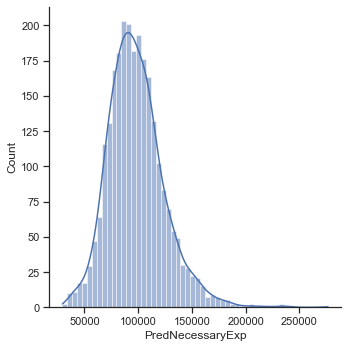

In [49]:
sns.displot(data=test, x='PredNecessaryExp', kde=True)

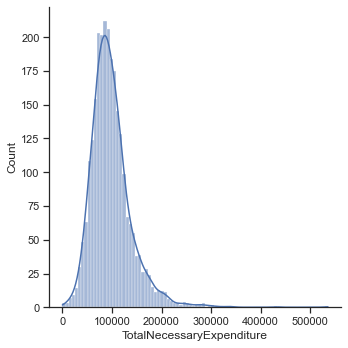

In [50]:
sns.displot(data=test, x='TotalNecessaryExpenditure', kde=True)

C:\Users\rames\anaconda3\envs\nus\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rames\anaconda3\envs\nus\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


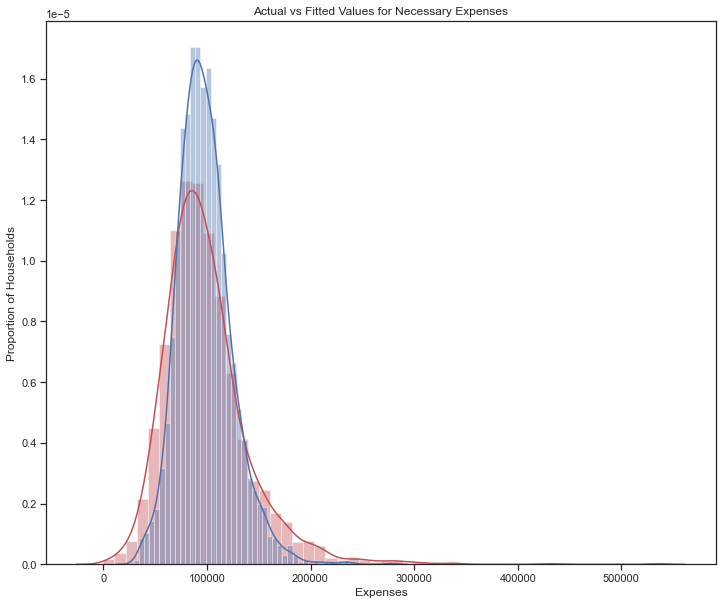

In [51]:
plt.figure(figsize=(12, 10))
ax1 = sns.distplot(test['TotalNecessaryExpenditure'], hist=True, color="r", label="Actual Values")
sns.distplot(test['PredNecessaryExp'], hist=True, color="b", label="Fitted Values", ax=ax1)
plt.title('Actual vs Fitted Values for Necessary Expenses')
plt.xlabel('Expenses')
plt.ylabel('Proportion of Households')
plt.show()

C:\Users\rames\anaconda3\envs\nus\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rames\anaconda3\envs\nus\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


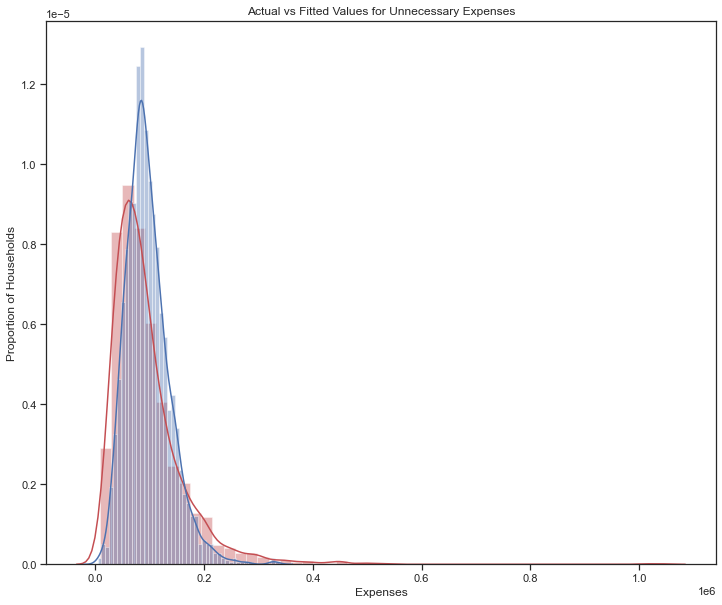

In [53]:
plt.figure(figsize=(12, 10))
ax1 = sns.distplot(test['TotalUnnecessaryExpenditure'], hist=True, color="r", label="Actual Values")
sns.distplot(test['PredUnnecessaryExp'], hist=True, color="b", label="Fitted Values", ax=ax1)
plt.title('Actual vs Fitted Values for Unnecessary Expenses')
plt.xlabel('Expenses')
plt.ylabel('Proportion of Households')
plt.show()

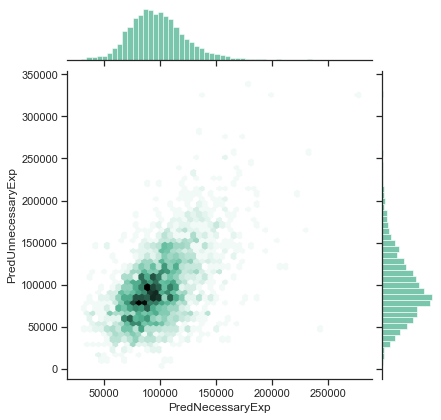

In [41]:
%matplotlib inline
sns.set_theme(style="ticks")
sns.jointplot(x=test['PredNecessaryExp'], y=test['PredUnnecessaryExp'], kind="hex", color="#4CB391")

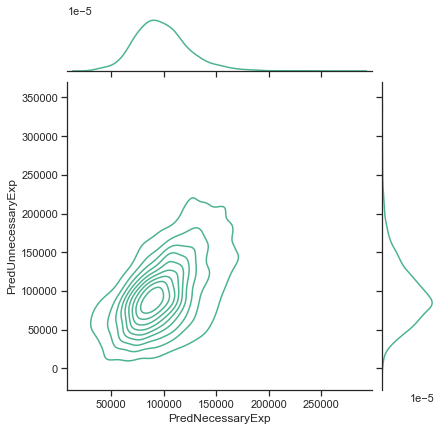

In [42]:
sns.jointplot(x=test['PredNecessaryExp'], y=test['PredUnnecessaryExp'], kind="kde", color="#4CB391", space=0.2)

In [43]:
test['TotalHouseholdIncome'] = data2['TotalHouseholdIncome']

In [44]:
test.head()

,Region,MainSourceofIncome,AgriculturalHouseholdindicator,ImputedHouseRentalValue,HouseholdHeadSex,HouseholdHeadAge,HouseholdHeadMaritalStatus,HouseholdHeadHighestGradeCompleted,HouseholdHeadJoborBusinessIndicator,HouseholdHeadOccupation,HouseholdHeadClassofWorker,TypeofHousehold,TotalNumberofFamilymembers,Memberswithagelessthan5yearold,Memberswithage517yearsold,Totalnumberoffamilymembersemployed,Electricity,MainSourceofWaterSupply,TotalMovableAssests,Dependants,HouseSpacePerPerson,MovableMerchPerPerson,TotalNecessaryExpenditure,TotalUnnecessaryExpenditure,CurrentTaxPaid,PredNecessaryExp,PredUnnecessaryExp,AdjustedTax,TotalHouseholdIncome
594,2,2,0,21000,1,53,2,21,1,277,4,1,4,0,0,3,1,0,14,1,10.750000,3.500000,143865,161806,75792.0,97567.488320,144794.294144,112478.545166,583168
36260,8,2,0,6000,1,39,2,21,1,277,3,1,5,0,3,1,1,3,7,4,3.000000,1.400000,128368,93980,15218.0,91888.459341,75324.114931,12474.715424,326090
39638,9,2,2,42000,1,56,2,28,1,37,4,0,9,0,4,5,1,3,9,4,22.222222,1.000000,146130,98409,84973.5,130810.741738,127352.121944,82726.811195,619894
16557,3,2,0,16200,1,68,2,4,0,359,2,0,7,0,2,2,1,8,6,5,7.857143,0.857143,93965,39354,6789.8,102915.923726,56012.416069,3695.376661,283949
1642,10,0,0,2400,1,38,2,6,1,171,4,1,9,1,3,4,1,3,10,5,2.444444,1.111111,96178,103545,31585.0,135611.009623,101100.366678,23547.166933,406340


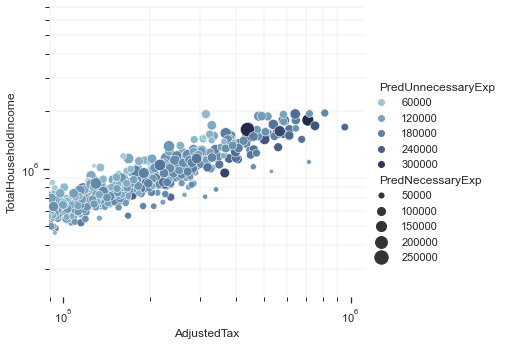

In [45]:
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=test,
    x="AdjustedTax", y="TotalHouseholdIncome",
    size="PredNecessaryExp", hue="PredUnnecessaryExp",
    palette=cmap, sizes=(10, 200),
)
g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)

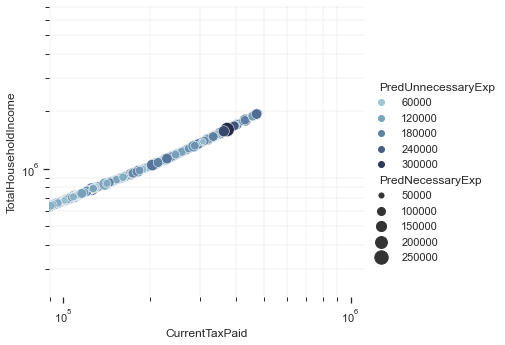

In [46]:
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=test,
    x="CurrentTaxPaid", y="TotalHouseholdIncome",
    size="PredNecessaryExp", hue="PredUnnecessaryExp",
    palette=cmap, sizes=(10, 200),
)
g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)

In [48]:
y_test1

NameError: name 'y_test1' is not defined